In [2]:
import numpy as np
from pathlib import Path
import sys
from timeit import default_timer as timer
from argparse import ArgumentParser
from cxiapi import cxiData
from cxiapi.litPixelsAnalyzer import litPixelsAnalyzer

In [5]:
# Experiment run number.
run = 366
# Hitfinding on which module.
module = 15
# Number of CPU processes to use, '0' means using all.
nproc = 0
# The folder of cxi files
cxi_folder = '/gpfs/exfel/u/scratch/SPB/202130/p900201/spi-comission/vds/'
# Cheetah files folder for calibration
calib_folder = '/gpfs/exfel/exp/SPB/202130/p900201/usr/Software/calib/r0361-r0362-r0363/'

run: 366
hitfinding with module 15

VDS file contains 62304 shots
Module 0 contains 352 cells
16 calibration files found
./r0366_hits.h5 contains 58233 frames.
Saved figure: run366_lit_pixels.png
Hit rate = 6.70%
Found 3904 hits above lit-pixel threshold = 433 ADU


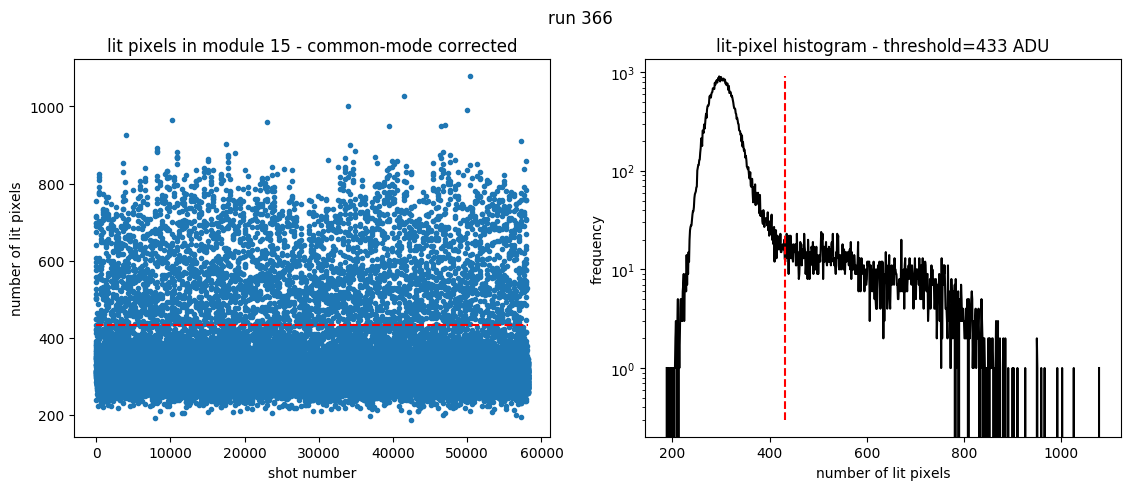

In [6]:
print(f'run: {run}')
print(f'hitfinding with module {module}\n')

cxi_path = Path(cxi_folder, f'r{run:04}.cxi')
fn = str(cxi_path)

cxi = cxiData(fn, verbose=1, debug=0)
pulse = np.arange(0, 352)
base_pulse_filter = np.ones(600, dtype="bool")
base_pulse_filter[len(pulse):] = False
base_pulse_filter[0] = False
base_pulse_filter[18::32] = False
base_pulse_filter[29::32] = False
good_cells = pulse[base_pulse_filter[:len(pulse)]]
cxi.setGoodCells(good_cells)

cxi.setCalib(
    calib_folder
)
cxi.setGeom()

analyzer = litPixelsAnalyzer(cxi, verbose=1)
analyzer.readLitPixels(f'./r{run:04}_hits.h5', module)

analyzer.setLitPixelsThreshold()

In [7]:
start_frame = timer()
analyzer.getHitFrames(selection=range(500))
end = timer()
print('getHitFrames: {:.2f} s elapsed'.format(end - start_frame))

analyzer.writeHitFrames()
end = timer()
print('Run {:04} done: {:.2f} s elapsed'.format(run, end - start_frame))

Calibrate 500 frames
Using 1 processes
Number of tasks per processes:
[500]
Memory allocation done
VDS data reading...
VDS data reading done in 234.05 s


(0001/0500) frames in process 0 in 0.41 s, 2.44 Hz
(0002/0500) frames in process 0 in 0.64 s, 3.13 Hz
(0003/0500) frames in process 0 in 0.75 s, 4.01 Hz
(0004/0500) frames in process 0 in 0.86 s, 4.67 Hz
(0005/0500) frames in process 0 in 0.96 s, 5.18 Hz
(0006/0500) frames in process 0 in 1.07 s, 5.59 Hz
(0007/0500) frames in process 0 in 1.18 s, 5.92 Hz
(0008/0500) frames in process 0 in 1.29 s, 6.20 Hz
(0009/0500) frames in process 0 in 1.40 s, 6.43 Hz
(0010/0500) frames in process 0 in 1.51 s, 6.63 Hz
(0011/0500) frames in process 0 in 1.62 s, 6.81 Hz
(0012/0500) frames in process 0 in 1.72 s, 6.96 Hz
(0013/0500) frames in process 0 in 1.83 s, 7.09 Hz
(0014/0500) frames in process 0 in 1.94 s, 7.21 Hz
(0015/0500) frames in process 0 in 2.05 s, 7.32 Hz
(0016/0500) frames in process 0 in 2.16 s, 7.42 Hz
(0017/0500) frames in process 0 in 2.27 s, 7.50 Hz
(0018/0500) frames in process 0 in 2.37 s, 7.58 Hz
(0019/0500) frames in process 0 in 2.48 s, 7.65 Hz
(0020/0500) frames in process 0

(0160/0500) frames in process 0 in 21.19 s, 7.55 Hz
(0161/0500) frames in process 0 in 21.29 s, 7.56 Hz
(0162/0500) frames in process 0 in 21.40 s, 7.57 Hz
(0163/0500) frames in process 0 in 21.51 s, 7.58 Hz
(0164/0500) frames in process 0 in 21.61 s, 7.59 Hz
(0165/0500) frames in process 0 in 21.72 s, 7.60 Hz
(0166/0500) frames in process 0 in 21.83 s, 7.61 Hz
(0167/0500) frames in process 0 in 21.93 s, 7.61 Hz
(0168/0500) frames in process 0 in 22.04 s, 7.62 Hz
(0169/0500) frames in process 0 in 22.15 s, 7.63 Hz
(0170/0500) frames in process 0 in 22.25 s, 7.64 Hz
(0171/0500) frames in process 0 in 22.36 s, 7.65 Hz
(0172/0500) frames in process 0 in 22.47 s, 7.66 Hz
(0173/0500) frames in process 0 in 22.57 s, 7.66 Hz
(0174/0500) frames in process 0 in 22.68 s, 7.67 Hz
(0175/0500) frames in process 0 in 22.79 s, 7.68 Hz
(0176/0500) frames in process 0 in 22.89 s, 7.69 Hz
(0177/0500) frames in process 0 in 23.32 s, 7.59 Hz
(0178/0500) frames in process 0 in 24.13 s, 7.38 Hz
(0179/0500) 

(0318/0500) frames in process 0 in 43.02 s, 7.39 Hz
(0319/0500) frames in process 0 in 43.12 s, 7.40 Hz
(0320/0500) frames in process 0 in 43.23 s, 7.40 Hz
(0321/0500) frames in process 0 in 43.34 s, 7.41 Hz
(0322/0500) frames in process 0 in 43.44 s, 7.41 Hz
(0323/0500) frames in process 0 in 43.55 s, 7.42 Hz
(0324/0500) frames in process 0 in 43.66 s, 7.42 Hz
(0325/0500) frames in process 0 in 43.76 s, 7.43 Hz
(0326/0500) frames in process 0 in 43.87 s, 7.43 Hz
(0327/0500) frames in process 0 in 43.98 s, 7.44 Hz
(0328/0500) frames in process 0 in 44.08 s, 7.44 Hz
(0329/0500) frames in process 0 in 44.19 s, 7.44 Hz
(0330/0500) frames in process 0 in 44.30 s, 7.45 Hz
(0331/0500) frames in process 0 in 44.41 s, 7.45 Hz
(0332/0500) frames in process 0 in 44.51 s, 7.46 Hz
(0333/0500) frames in process 0 in 44.62 s, 7.46 Hz
(0334/0500) frames in process 0 in 45.28 s, 7.38 Hz
(0335/0500) frames in process 0 in 45.60 s, 7.35 Hz
(0336/0500) frames in process 0 in 45.71 s, 7.35 Hz
(0337/0500) 

(0476/0500) frames in process 0 in 64.18 s, 7.42 Hz
(0477/0500) frames in process 0 in 64.29 s, 7.42 Hz
(0478/0500) frames in process 0 in 64.39 s, 7.42 Hz
(0479/0500) frames in process 0 in 64.50 s, 7.43 Hz
(0480/0500) frames in process 0 in 64.61 s, 7.43 Hz
(0481/0500) frames in process 0 in 64.71 s, 7.43 Hz
(0482/0500) frames in process 0 in 64.82 s, 7.44 Hz
(0483/0500) frames in process 0 in 64.93 s, 7.44 Hz
(0484/0500) frames in process 0 in 65.03 s, 7.44 Hz
(0485/0500) frames in process 0 in 65.14 s, 7.45 Hz
(0486/0500) frames in process 0 in 65.25 s, 7.45 Hz
(0487/0500) frames in process 0 in 65.36 s, 7.45 Hz
(0488/0500) frames in process 0 in 65.46 s, 7.45 Hz
(0489/0500) frames in process 0 in 65.57 s, 7.46 Hz
(0490/0500) frames in process 0 in 65.68 s, 7.46 Hz
(0491/0500) frames in process 0 in 66.49 s, 7.38 Hz
(0492/0500) frames in process 0 in 67.25 s, 7.32 Hz
(0493/0500) frames in process 0 in 67.36 s, 7.32 Hz
(0494/0500) frames in process 0 in 67.46 s, 7.32 Hz
(0495/0500) 

Assembled 500 frames in 12.09 s
getHitFrames: 317.36 s elapsed
Saved 500 frames from run 366 to: r0366_hits.h5
Run 0366 done: 320.37 s elapsed
